### Vectorization

Lets vectorize the processed data and store our vectorizers in pickle file. After that we will apply various ML models and do cross validation as next steps.

In [20]:
import pandas as pd 
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
processed_cleaned = pd.read_csv('../data/interim/processed_cleaned.csv')

In [22]:
processed_cleaned['num_code'] = processed_cleaned['num_code'].apply(str)
processed_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300259 entries, 0 to 300258
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   airline         300259 non-null  object
 1   ch_code         300259 non-null  object
 2   num_code        300259 non-null  object
 3   from            300259 non-null  object
 4   time_taken      300259 non-null  int64 
 5   stop            300259 non-null  object
 6   to              300259 non-null  object
 7   price           300259 non-null  int64 
 8   type            300259 non-null  object
 9   days_left       300259 non-null  int64 
 10  dep_time_phase  300259 non-null  object
 11  arr_time_phase  300259 non-null  object
dtypes: int64(3), object(9)
memory usage: 27.5+ MB


In [24]:
vectorized_data = processed_cleaned.copy()
vectorizers = {}
for col in vectorized_data.columns:
    if vectorized_data[col].dtype == 'O':
        encoder = LabelEncoder()
        vectorized_data[col] = encoder.fit_transform(vectorized_data[col])
        vectorizers[col] = encoder
        print('Vectorization of {0} is done.'.format(col))
        
categorical_pkl_file = '../models/categorical_vectorizers.pkl'
with open(categorical_pkl_file, 'wb') as f:
    pickle.dump(vectorizers, f)
print('Dumped the vectorizers in {} file'.format(categorical_pkl_file))        
        

Vectorization of airline is done.
Vectorization of ch_code is done.
Vectorization of num_code is done.
Vectorization of from is done.
Vectorization of stop is done.
Vectorization of to is done.
Vectorization of type is done.
Vectorization of dep_time_phase is done.
Vectorization of arr_time_phase is done.
Dumped the vectorizers in ../models/categorical_vectorizers.pkl file


#### Lets see correlation of the features

In [25]:
corr_matrix = vectorized_data.corr()
corr_matrix

,airline,ch_code,num_code,from,time_taken,stop,to,price,type,days_left,dep_time_phase,arr_time_phase
airline,1.000000,0.880926,0.506352,-0.035577,0.007289,-0.034053,-0.038938,0.243708,-0.178115,-0.003191,0.060300,0.089774
ch_code,0.880926,1.000000,0.556862,-0.028389,0.168307,-0.085551,-0.034529,0.311006,-0.254182,-0.005893,0.109193,0.112180
num_code,0.506352,0.556862,1.000000,0.044520,0.194778,-0.113811,-0.056989,0.289988,-0.260133,-0.007599,0.100772,0.125813
from,-0.035577,-0.028389,0.044520,1.000000,0.004604,0.001619,-0.222944,0.004681,-0.000022,-0.003541,-0.037122,0.015466
time_taken,0.007289,0.168307,0.194778,0.004604,1.000000,-0.349502,0.005451,0.194036,-0.143114,-0.036624,0.188125,0.102508
stop,-0.034053,-0.085551,-0.113811,0.001619,-0.349502,1.000000,-0.013026,-0.202725,0.100381,-0.007025,0.008401,-0.018842
to,-0.038938,-0.034529,-0.056989,-0.222944,0.005451,-0.013026,1.000000,0.004900,0.001515,-0.005313,0.022097,-0.007326
price,0.243708,0.311006,0.289988,0.004681,0.194036,-0.202725,0.004900,1.000000,-0.937868,-0.091918,0.080978,0.077123
type,-0.178115,-0.254182,-0.260133,-0.000022,-0.143114,0.100381,0.001515,-0.937868,1.000000,0.013024,-0.080769,-0.056311
days_left,-0.003191,-0.005893,-0.007599,-0.003541,-0.036624,-0.007025,-0.005313,-0.091918,0.013024,1.000000,-0.008204,-0.011590


<Axes: >

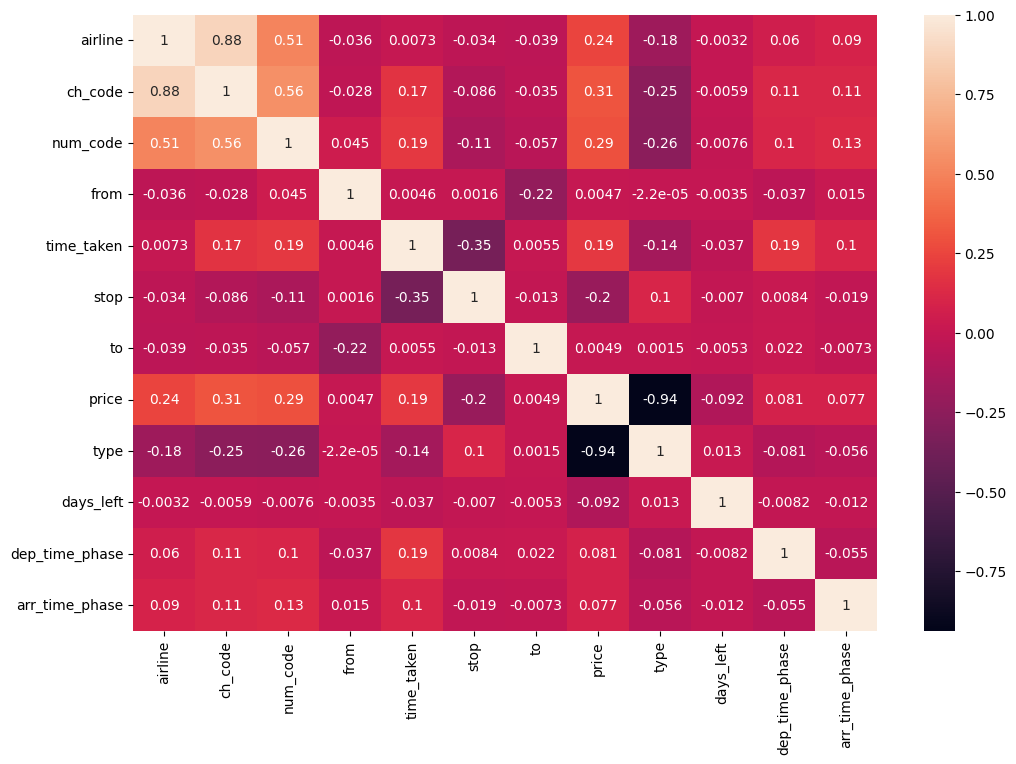

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True)

In [35]:
vectorized_data['num_code'].describe()

count    300259.000000
mean        840.989456
std         325.300033
min           0.000000
25%         604.000000
50%         990.000000
75%        1091.000000
max        1254.000000
Name: num_code, dtype: float64

In [36]:
processed_cleaned['num_code'].describe()

count     300259
unique      1255
top          808
freq        3313
Name: num_code, dtype: object

In [31]:
import os
processed_data_folder = "../data/processed"

vectorized_data.to_csv(processed_data_folder+"/vectorized_data.csv", index=False)
print('Vectorized data exported.')
print('List of files under ../data/processed: {0}'.format(os.listdir(processed_data_folder)))

Vectorized data exported.
List of files under ../data/processed: ['.gitkeep', 'processed.csv', 'vectorized_data.csv']
